In [58]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import torch
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

In [3]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq)  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear(lstm_out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out

In [4]:
SEQ_LEN = 128
INPUT_SIZE = 100
#HIDDEN_SIZE = 32 - for more complex case of multi_dist=True
HIDDEN_SIZE = 8


# InDiD

In [5]:
base_model_cpd = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

cpd_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='CPD', experiment_type='synthetic_100D', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [6]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [7]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 7777

In [8]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | CPDLoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 1.611


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.128 >= min_delta = 0.01. New best score: 1.483


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.174 >= min_delta = 0.01. New best score: 1.309


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.181 >= min_delta = 0.01. New best score: 1.128


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.165 >= min_delta = 0.01. New best score: 0.962


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.135 >= min_delta = 0.01. New best score: 0.828


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.153 >= min_delta = 0.01. New best score: 0.675


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.165 >= min_delta = 0.01. New best score: 0.510


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.140 >= min_delta = 0.01. New best score: 0.370


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.182 >= min_delta = 0.01. New best score: 0.188


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.200 >= min_delta = 0.01. New best score: -0.011


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.203 >= min_delta = 0.01. New best score: -0.214


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.241 >= min_delta = 0.01. New best score: -0.455


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.276 >= min_delta = 0.01. New best score: -0.731


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.314 >= min_delta = 0.01. New best score: -1.045


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.366 >= min_delta = 0.01. New best score: -1.412


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.411 >= min_delta = 0.01. New best score: -1.823


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.482 >= min_delta = 0.01. New best score: -2.304


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.593 >= min_delta = 0.01. New best score: -2.898


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.661 >= min_delta = 0.01. New best score: -3.558


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.817 >= min_delta = 0.01. New best score: -4.375


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.087 >= min_delta = 0.01. New best score: -5.462


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.119 >= min_delta = 0.01. New best score: -6.581


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.339 >= min_delta = 0.01. New best score: -7.920


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.553 >= min_delta = 0.01. New best score: -9.474


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.769 >= min_delta = 0.01. New best score: -11.243


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.031 >= min_delta = 0.01. New best score: -13.274


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.087 >= min_delta = 0.01. New best score: -16.361


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.575 >= min_delta = 0.01. New best score: -19.936


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.731 >= min_delta = 0.01. New best score: -24.667


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.133 >= min_delta = 0.01. New best score: -28.801


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.732 >= min_delta = 0.01. New best score: -32.533


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.488 >= min_delta = 0.01. New best score: -36.021


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.573 >= min_delta = 0.01. New best score: -39.594


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.293 >= min_delta = 0.01. New best score: -42.886


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.182 >= min_delta = 0.01. New best score: -46.068


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.010 >= min_delta = 0.01. New best score: -49.078


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.952 >= min_delta = 0.01. New best score: -52.030


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.795 >= min_delta = 0.01. New best score: -54.825


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.521 >= min_delta = 0.01. New best score: -57.346


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.460 >= min_delta = 0.01. New best score: -59.806


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.283 >= min_delta = 0.01. New best score: -62.089


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.185 >= min_delta = 0.01. New best score: -64.274


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.029 >= min_delta = 0.01. New best score: -66.303


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.759 >= min_delta = 0.01. New best score: -68.062


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.785 >= min_delta = 0.01. New best score: -69.848


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.544 >= min_delta = 0.01. New best score: -71.391


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.452 >= min_delta = 0.01. New best score: -72.844


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.407 >= min_delta = 0.01. New best score: -74.251


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.290 >= min_delta = 0.01. New best score: -75.541


# BCE_seq2seq model

In [9]:
base_model_bce = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                      n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

bce_model = models.CPD_model(model=base_model_cpd, T=None,
                             loss_type='BCE', experiment_type='synthetic_100D', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [10]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [11]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | BCELoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.216


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.204


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.01. New best score: 0.191


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.180


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.169


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.159


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.146


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.135


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.125


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.113


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.103


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.103. Signaling Trainer to stop.


# Combined

In [12]:
base_model_comb = LSTM(input_size=INPUT_SIZE, output_size=SEQ_LEN, 
                       n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='synthetic_100D', 
                                    lr=0.001, batch_size=64)

combined_model_2 = models.CPD_model(model=base_model_comb, T=32,
                                    loss_type='CPD', experiment_type='synthetic_100D', 
                                    lr=0.001, batch_size=64)

In [13]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer_1 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [14]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | BCELoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.630


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.065 >= min_delta = 0.01. New best score: 0.565


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.051 >= min_delta = 0.01. New best score: 0.514


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.036 >= min_delta = 0.01. New best score: 0.479


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 0.455


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.436


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.419


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.403


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.386


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.367


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.356


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.345


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.334


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.036 >= min_delta = 0.01. New best score: 0.298


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.284


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.264


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.254


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.239


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.227


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.01. New best score: 0.213


Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 3.5 K 
1 | loss  | CPDLoss | 0     
----------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.490 >= min_delta = 0.01. New best score: -1.277


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.827 >= min_delta = 0.01. New best score: -2.103


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.809 >= min_delta = 0.01. New best score: -2.912


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.814 >= min_delta = 0.01. New best score: -3.726


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.037 >= min_delta = 0.01. New best score: -4.763


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.074 >= min_delta = 0.01. New best score: -5.837


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.327 >= min_delta = 0.01. New best score: -7.164


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.395 >= min_delta = 0.01. New best score: -8.560


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.716 >= min_delta = 0.01. New best score: -10.276


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.813 >= min_delta = 0.01. New best score: -12.089


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.173 >= min_delta = 0.01. New best score: -14.262


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.099 >= min_delta = 0.01. New best score: -16.362


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.529 >= min_delta = 0.01. New best score: -18.891


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.441 >= min_delta = 0.01. New best score: -21.332


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.665 >= min_delta = 0.01. New best score: -23.997


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.805 >= min_delta = 0.01. New best score: -26.802


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.791 >= min_delta = 0.01. New best score: -29.593


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.644 >= min_delta = 0.01. New best score: -32.237


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.964 >= min_delta = 0.01. New best score: -35.201


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.953 >= min_delta = 0.01. New best score: -38.154


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.736 >= min_delta = 0.01. New best score: -40.890


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.889 >= min_delta = 0.01. New best score: -43.779


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.583 >= min_delta = 0.01. New best score: -46.362


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.495 >= min_delta = 0.01. New best score: -48.856


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.534 >= min_delta = 0.01. New best score: -51.390


# Baselines

In [79]:
l2_model = models.L2Baseline(l2_type="one_by_one", device='cuda')   
zero_model = models.ZeroBaseline(device='cuda')    
#binseg_model_1 = models.ClassicBaseline(rpt.Binseg(), n_pred=None, pen=738.5)
binseg_model = models.ClassicBaseline(rpt.Binseg(), n_pred=1, pen=None)
pelt_model = models.ClassicBaseline(rpt.Pelt(), n_pred=None, pen=738.8)
#kernel_model_1 = models.ClassicBaseline(rpt.KernelCPD(kernel="rbf"), pen=12.22)
kernel_model = models.ClassicBaseline(rpt.KernelCPD(kernel="rbf"), n_pred=1)

# Calculate metrics

## Detection curve and Area under detection curve

In [49]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [50]:
_, delay_list_cpd, fp_delay_list_cpd = metrics.evaluation_pipeline(cpd_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


AUC: 468.5271
Time to FA 97.7333, delay detection 0.0633 for best-cover threshold: 0.4372
TP 145, TN 155, FP 0, FN 0 for best-cover threshold: 0.4372
Max COVER 0.999: for threshold 0.4372
Max F1 1.0: for threshold 0.4372
F1 1.0: for best-cover threshold 0.4372
Max F1_ruptures (M=5) 1.0: for threshold 0.6585
F1_ruptures 0.9931: for best-cover threshold 0.4372


In [51]:
_, delay_list_bce, fp_delay_list_bce = metrics.evaluation_pipeline(bce_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 468.5271
Time to FA 97.7333, delay detection 0.0633 for best-cover threshold: 0.4372
TP 145, TN 155, FP 0, FN 0 for best-cover threshold: 0.4372
Max COVER 0.999: for threshold 0.4372
Max F1 1.0: for threshold 0.4372
F1 1.0: for best-cover threshold 0.4372
Max F1_ruptures (M=5) 1.0: for threshold 0.6585
F1_ruptures 0.9931: for best-cover threshold 0.4372


In [52]:
_, delay_list_comb, fp_delay_list_comb = metrics.evaluation_pipeline(combined_model_2, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 600.7187
Time to FA 98.2267, delay detection 2.4933 for best-cover threshold: 0.2384
TP 135, TN 155, FP 2, FN 8 for best-cover threshold: 0.2384
Max COVER 0.9671: for threshold 0.2384
Max F1 0.968: for threshold 0.3192
F1 0.9643: for best-cover threshold 0.2384
Max F1_ruptures (M=5) 0.8841: for threshold 0.2036
F1_ruptures 0.8613: for best-cover threshold 0.2384


In [61]:
_, delay_list_l2, fp_delay_list_l2 = metrics.evaluation_pipeline(l2_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 1000.3133
Time to FA 61.9, delay detection 0.0 for best-cover threshold: 0.9926
TP 145, TN 0, FP 155, FN 0 for best-cover threshold: 0.9926
Max COVER 0.7201: for threshold 0.9926
Max F1 0.6517: for threshold 0.9703
F1 0.6517: for best-cover threshold 0.9926
Max F1_ruptures (M=5) 1.0: for threshold 0.9703
F1_ruptures 1.0: for best-cover threshold 0.9926


In [64]:
_, delay_list_zero, fp_delay_list_zero = metrics.evaluation_pipeline(zero_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 128.0, delay detection 30.2667 for best-cover threshold: 0.5
TP 0, TN 155, FP 0, FN 145 for best-cover threshold: 0.5
Max COVER 0.7635: for threshold 0.5
Max F1 0.0: for threshold 0.5
F1 0.0: for best-cover threshold 0.5
Max F1_ruptures (M=5) nan: for threshold 0.5
F1_ruptures nan: for best-cover threshold 0.5


/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eromanenkova/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [83]:
 _, delay_list_binseg, fp_delay_list_binseg = metrics.evaluation_pipeline(binseg_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 62.9367, delay detection 0.28 for best-cover threshold: 0.5
TP 87, TN 0, FP 213, FN 0 for best-cover threshold: 0.5
Max COVER 0.7218: for threshold 0.5
Max F1 0.4496: for threshold 0.5
F1 0.4496: for best-cover threshold 0.5
Max F1_ruptures (M=5) 1.0: for threshold 0.5
F1_ruptures 1.0: for best-cover threshold 0.5


In [80]:
_, delay_list_pelt, fp_delay_list_pelt = metrics.evaluation_pipeline(pelt_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 96.9467, delay detection 0.0533 for best-cover threshold: 0.5
TP 44, TN 155, FP 101, FN 0 for best-cover threshold: 0.5
Max COVER 0.9875: for threshold 0.5
Max F1 0.4656: for threshold 0.5
F1 0.4656: for best-cover threshold 0.5
Max F1_ruptures (M=5) 1.0: for threshold 0.5
F1_ruptures 1.0: for best-cover threshold 0.5


In [81]:
_, delay_list_kernel, fp_delay_list_kernel = metrics.evaluation_pipeline(kernel_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 63.9533, delay detection 0.0067 for best-cover threshold: 0.5
TP 145, TN 0, FP 155, FN 0 for best-cover threshold: 0.5
Max COVER 0.736: for threshold 0.5
Max F1 0.6517: for threshold 0.5
F1 0.6517: for best-cover threshold 0.5
Max F1_ruptures (M=5) 1.0: for threshold 0.5
F1_ruptures 1.0: for best-cover threshold 0.5


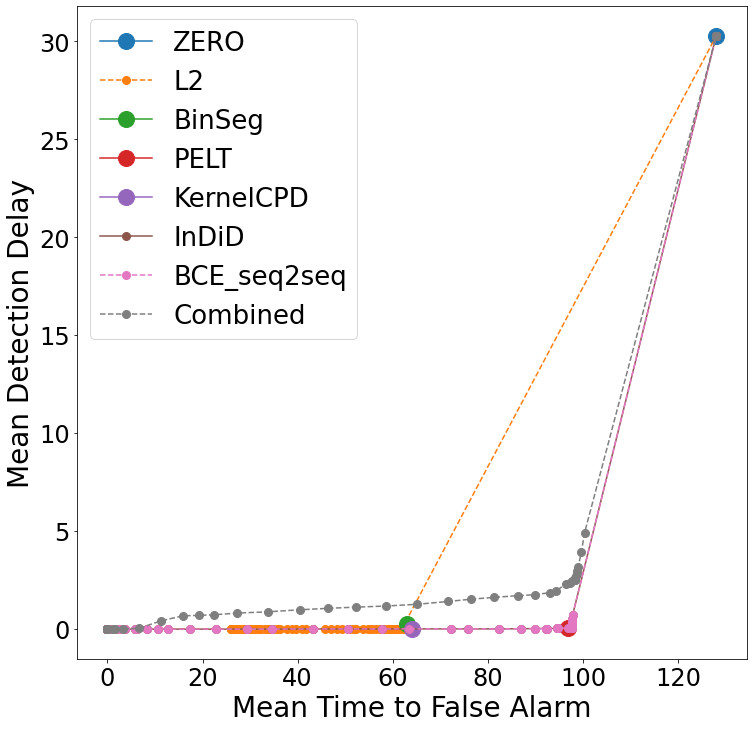

In [86]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_zero, delay_list_zero, '-o', markersize=16, label='ZERO')
plt.plot(fp_delay_list_l2, delay_list_l2, '--o', markersize=8, label='L2')
plt.plot(fp_delay_list_binseg, delay_list_binseg, '-o', markersize=16, label='BinSeg')
plt.plot(fp_delay_list_pelt, delay_list_pelt, '-o', markersize=16, label='PELT')
plt.plot(fp_delay_list_kernel, delay_list_kernel, '-o', markersize=16, label='KernelCPD')
plt.plot(fp_delay_list_cpd, delay_list_cpd, '-o', markersize=8, label='InDiD')
plt.plot(fp_delay_list_bce, delay_list_bce, '--o', markersize=8, label='BCE_seq2seq')
plt.plot(fp_delay_list_comb, delay_list_comb, '--o', markersize=8, label='Combined')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);